## Objective

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as st

## Loading dataset

In [2]:
df = pd.read_csv("../datasets/Seasonwiseprocurementdetails2023_0.csv")

In [3]:
df.columns

Index(['District', 'Commodity', 'Season', 'Qty(MTs)', 'No of Farmers',
       'Amount(Rs)'],
      dtype='object')

In [4]:
df

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs)
0,ANANTHAPUR,Maize,Kharif-2020,276644.5,6762.0,451162275.0
1,ANANTHAPUR,Redgram,Kharif-2020,679.5,62.0,4029000.0
2,ANANTHAPUR,Jowar,Rabi 2020-21,2688.5,127.0,4973725.0
3,ANANTHAPUR,Bengal gram,Rabi 2021-22,9333.5,681.0,48814205.0
4,ANANTHAPUR,Bajra,Kharif-2020,3193.0,173.0,5228800.0
...,...,...,...,...,...,...
96,YSR,Bengal gram,Rabi 2021-22,99117.5,6027.0,518384525.0
97,YSR,Turmeric Bulb,Rabi 2021-22,16.8,3.0,115080.0
98,YSR,NaN,Kharif-2020,2201.0,NaN,4001550.0
99,VIZIANAGARAM,Maize,Kharif-2020,206721.0,6947.0,367660675.0


## Identify needed data ponts

In [5]:
df.shape

(101, 6)

In [6]:
new_df = df[['District', 'Commodity', 'Season', 'Qty(MTs)', 'No of Farmers', 'Amount(Rs)']]
new_df.head()

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs)
0,ANANTHAPUR,Maize,Kharif-2020,276644.5,6762.0,451162275.0
1,ANANTHAPUR,Redgram,Kharif-2020,679.5,62.0,4029000.0
2,ANANTHAPUR,Jowar,Rabi 2020-21,2688.5,127.0,4973725.0
3,ANANTHAPUR,Bengal gram,Rabi 2021-22,9333.5,681.0,48814205.0
4,ANANTHAPUR,Bajra,Kharif-2020,3193.0,173.0,5228800.0


In [7]:
df[df.duplicated()]

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs)
99,VIZIANAGARAM,Maize,Kharif-2020,206721.0,6947.0,367660675.0
100,YSR,Groundnut in shell,Kharif-2020,1370.1,193.0,7003925.0


In [8]:
new_df.drop_duplicates(inplace=True)
new_df.shape

(99, 6)

## Identify and remove null values

In [9]:
new_df.isnull().sum()

District         0
Commodity        1
Season           1
Qty(MTs)         0
No of Farmers    1
Amount(Rs)       1
dtype: int64

In [10]:
(1 / len(df)) * 100

0.9900990099009901

In [11]:
new_df.dropna(inplace=True)
new_df

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs)
0,ANANTHAPUR,Maize,Kharif-2020,276644.5,6762.0,451162275.0
1,ANANTHAPUR,Redgram,Kharif-2020,679.5,62.0,4029000.0
2,ANANTHAPUR,Jowar,Rabi 2020-21,2688.5,127.0,4973725.0
3,ANANTHAPUR,Bengal gram,Rabi 2021-22,9333.5,681.0,48814205.0
4,ANANTHAPUR,Bajra,Kharif-2020,3193.0,173.0,5228800.0
...,...,...,...,...,...,...
93,YSR,Bajra,Kharif-2020,28491.0,1377.0,60667625.0
94,YSR,Maize,Kharif-2020,2201.0,85.0,4001550.0
95,YSR,Bengal gram,Rabi 2020-21,16110.0,1215.0,81515850.0
96,YSR,Bengal gram,Rabi 2021-22,99117.5,6027.0,518384525.0


In [12]:
new_df.shape

(97, 6)

## Adjusting datatypes

In [13]:
new_df.dtypes

District          object
Commodity         object
Season            object
Qty(MTs)         float64
No of Farmers    float64
Amount(Rs)       float64
dtype: object

In [14]:
new_df["No of Farmers"] = new_df["No of Farmers"].astype("int64")
new_df

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs)
0,ANANTHAPUR,Maize,Kharif-2020,276644.5,6762,451162275.0
1,ANANTHAPUR,Redgram,Kharif-2020,679.5,62,4029000.0
2,ANANTHAPUR,Jowar,Rabi 2020-21,2688.5,127,4973725.0
3,ANANTHAPUR,Bengal gram,Rabi 2021-22,9333.5,681,48814205.0
4,ANANTHAPUR,Bajra,Kharif-2020,3193.0,173,5228800.0
...,...,...,...,...,...,...
93,YSR,Bajra,Kharif-2020,28491.0,1377,60667625.0
94,YSR,Maize,Kharif-2020,2201.0,85,4001550.0
95,YSR,Bengal gram,Rabi 2020-21,16110.0,1215,81515850.0
96,YSR,Bengal gram,Rabi 2021-22,99117.5,6027,518384525.0


## Replace values

In [15]:
new_df.replace(['Maize', 'Bajra'], ['Corn', 'Pearl Millet'], inplace=True)
new_df.replace(['Rabi 2019-20', 'Rabi 2020-21', 'Rabi 2021-22'], ['Rabi 2020', 'Rabi 2021', 'Rabi 2022'], inplace=True)
new_df

,District,Commodity,Season,Qty(MTs),No of Farmers,Amount(Rs)
0,ANANTHAPUR,Corn,Kharif-2020,276644.5,6762,451162275.0
1,ANANTHAPUR,Redgram,Kharif-2020,679.5,62,4029000.0
2,ANANTHAPUR,Jowar,Rabi 2021,2688.5,127,4973725.0
3,ANANTHAPUR,Bengal gram,Rabi 2022,9333.5,681,48814205.0
4,ANANTHAPUR,Pearl Millet,Kharif-2020,3193.0,173,5228800.0
...,...,...,...,...,...,...
93,YSR,Pearl Millet,Kharif-2020,28491.0,1377,60667625.0
94,YSR,Corn,Kharif-2020,2201.0,85,4001550.0
95,YSR,Bengal gram,Rabi 2021,16110.0,1215,81515850.0
96,YSR,Bengal gram,Rabi 2022,99117.5,6027,518384525.0


## Analysis

In [16]:
new_df.describe()

,Qty(MTs),No of Farmers,Amount(Rs)
count,9.700000e+01,97.000000,9.700000e+01
mean,7.656789e+04,1854.247423,1.718125e+08
std,1.842849e+05,3494.834152,3.554619e+08
min,1.680000e+01,3.000000,1.150800e+05
25%,1.158000e+03,88.000000,4.448325e+06
50%,7.270500e+03,358.000000,2.489084e+07
75%,4.146400e+04,1776.000000,9.531705e+07
max,1.232776e+06,18614.000000,1.974546e+09


In [17]:
new_df["No of Farmers"].value_counts(normalize=True)

No of Farmers
3       0.030928
8       0.020619
27      0.020619
521     0.020619
23      0.020619
          ...   
783     0.010309
1377    0.010309
85      0.010309
1215    0.010309
6027    0.010309
Name: proportion, Length: 89, dtype: float64

## Identifying outliers

(array([74.,  9.,  4.,  6.,  3.,  1.,  0.,  1.,  0.,  2.]),
 array([3.00000e+00, 1.86410e+03, 3.72520e+03, 5.58630e+03, 7.44740e+03,
        9.30850e+03, 1.11696e+04, 1.30307e+04, 1.48918e+04, 1.67529e+04,
        1.86140e+04]),
 <BarContainer object of 10 artists>)

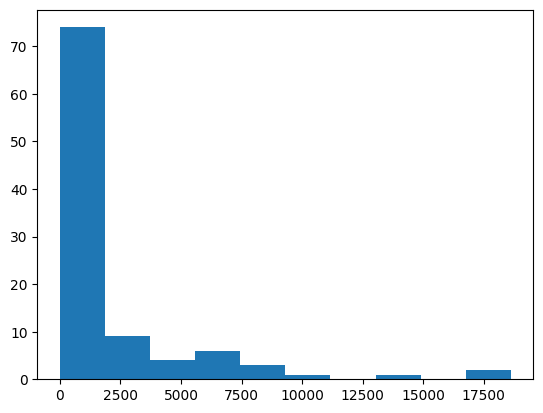

In [18]:
plt.hist(df["No of Farmers"])

<Axes: title={'center': 'No of Farmers'}, xlabel='Season'>

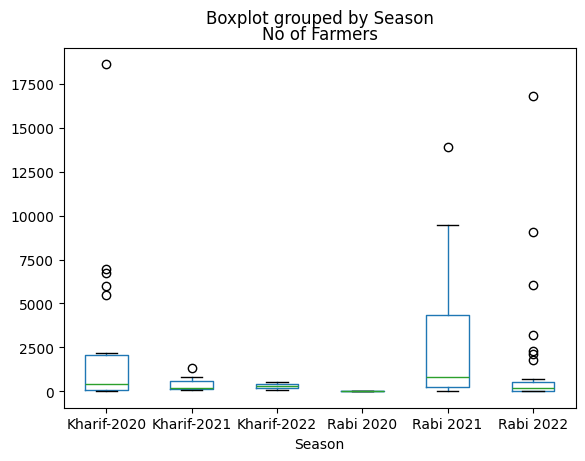

In [19]:
new_df.boxplot(by="Season", column=["No of Farmers"], grid=False)

<Axes: title={'center': 'Qty(MTs)'}, xlabel='Season'>

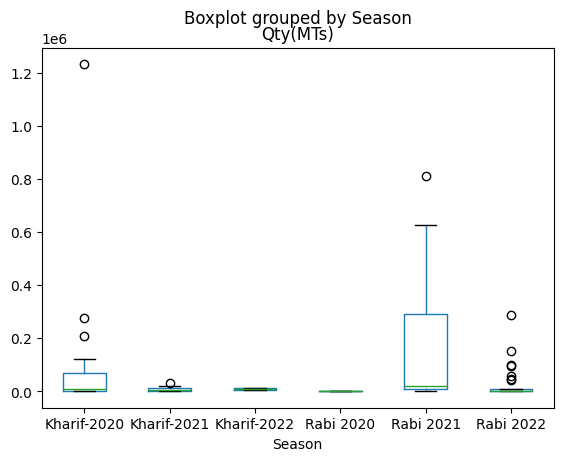

In [20]:
new_df.boxplot(by="Season", column=["Qty(MTs)"], grid=False)

<Axes: title={'center': 'Amount(Rs)'}, xlabel='Season'>

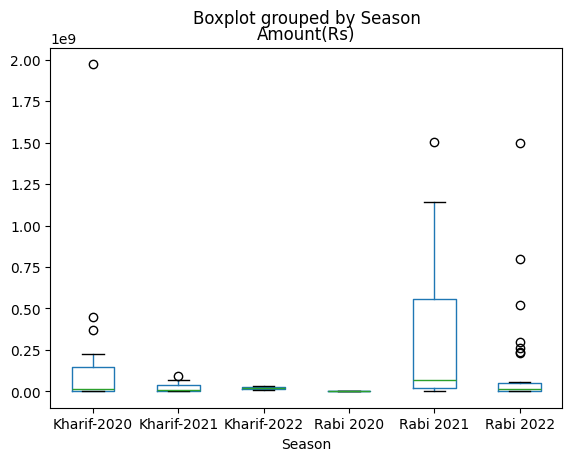

In [21]:
new_df.boxplot(by="Season", column=["Amount(Rs)"], grid=False)

## Removing outliers

In [22]:
for column in ["No of Farmers", "Qty(MTs)", "Amount(Rs)"]:
    q1 = new_df[column].quantile(0.25)
    q3 = new_df[column].quantile(0.75)
    IQR = q3-q1
    lower_boundary = q1 - 1.5 * IQR
    upper_boundary = q3 + 1.5 * IQR
    print(q1, q3, IQR, lower_boundary, upper_boundary)
    new_df = new_df[(new_df[column] >= lower_boundary) & (new_df[column] <= upper_boundary)]

88.0 1776.0 1688.0 -2444.0 4308.0
1057.625 15784.0 14726.375 -21031.9375 37873.5625
2716367.5 37571473.75 34855106.25 -49566291.875 89854133.125


In [23]:
new_df.shape

(69, 6)

In [24]:
new_df.describe()

,Qty(MTs),No of Farmers,Amount(Rs)
count,69.000000,69.000000,6.900000e+01
mean,5830.556522,302.782609,1.813377e+07
std,7451.157852,396.240861,2.060001e+07
min,16.800000,3.000000,1.150800e+05
25%,626.000000,28.000000,2.651635e+06
50%,2374.000000,160.000000,7.991175e+06
75%,8868.000000,445.000000,3.139365e+07
max,30608.500000,1865.000000,8.151585e+07


<Axes: title={'center': 'No of Farmers'}, xlabel='Season'>

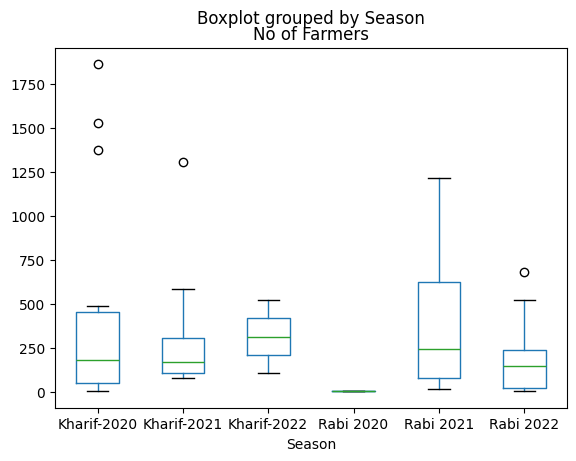

In [25]:
new_df.boxplot(by="Season", column=["No of Farmers"], grid=False)

<Axes: title={'center': 'Qty(MTs)'}, xlabel='Season'>

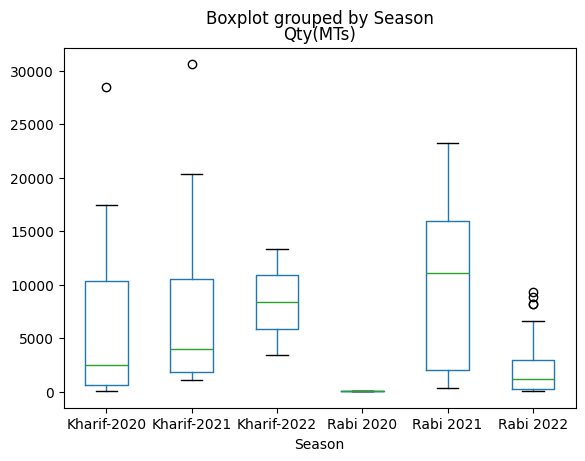

In [26]:
new_df.boxplot(by="Season", column=["Qty(MTs)"], grid=False)

<Axes: title={'center': 'Amount(Rs)'}, xlabel='Season'>

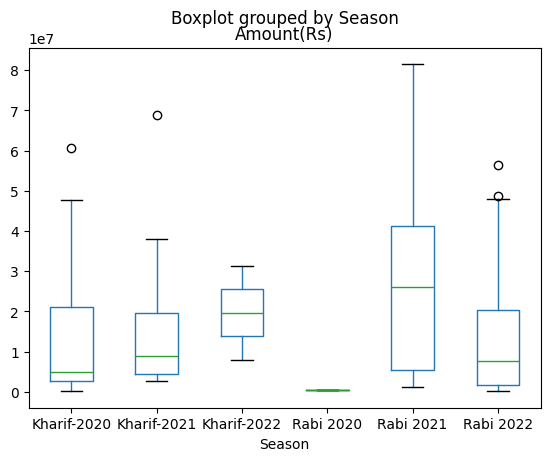

In [27]:
new_df.boxplot(by="Season", column=["Amount(Rs)"], grid=False)

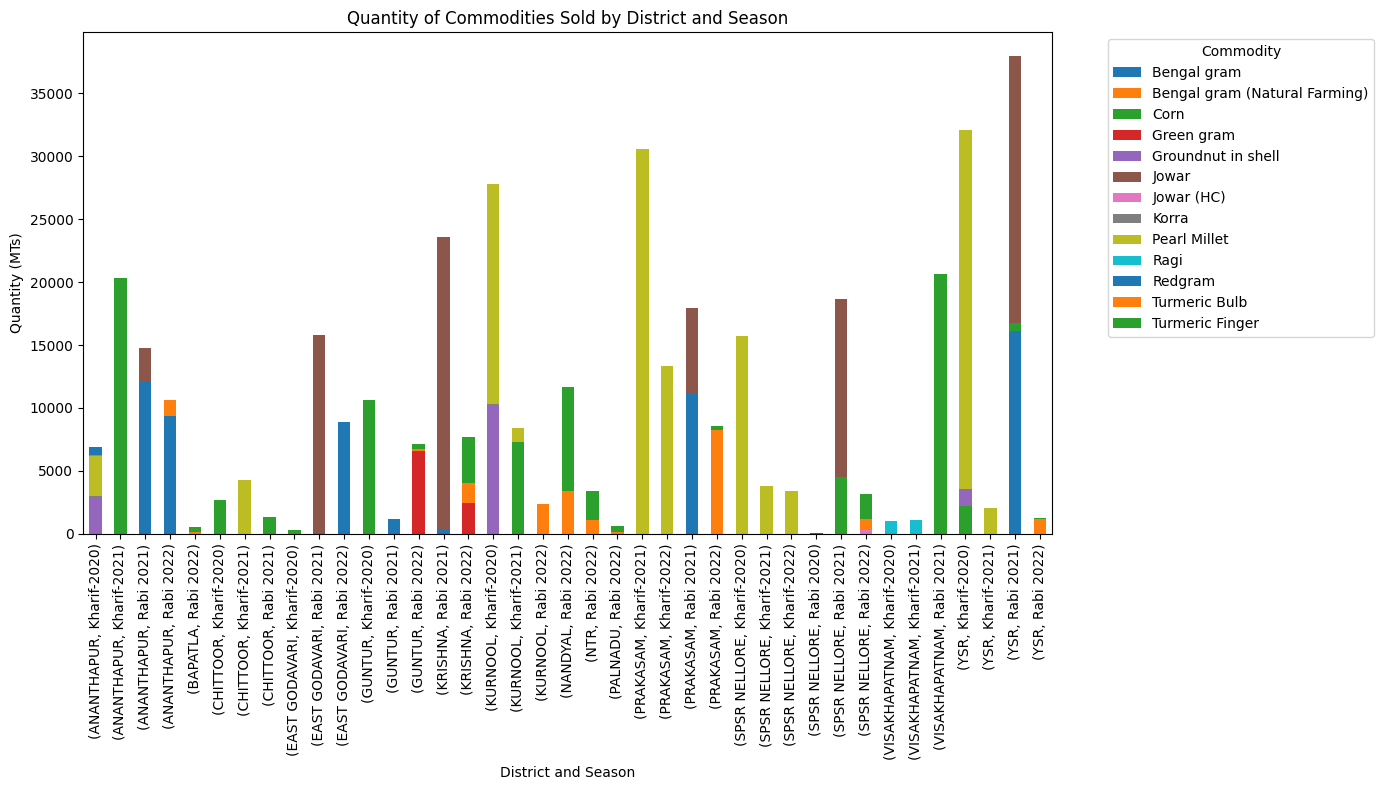

In [28]:
pivot_table = new_df.pivot_table(index=['District', 'Season'], columns='Commodity', values='Qty(MTs)', aggfunc='sum', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))

# Add labels and title
plt.xlabel('District and Season')
plt.ylabel('Quantity (MTs)')
plt.title('Quantity of Commodities Sold by District and Season')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()